In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurment = Base.classes.measurement
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
inspector = inspect(engine)
measurment_columns = inspector.get_columns("measurment")
for c in measurment_columns:
    print(c["name"], c["type"])
most_recent_date = session.query(measurment.date).order_by(measurment.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


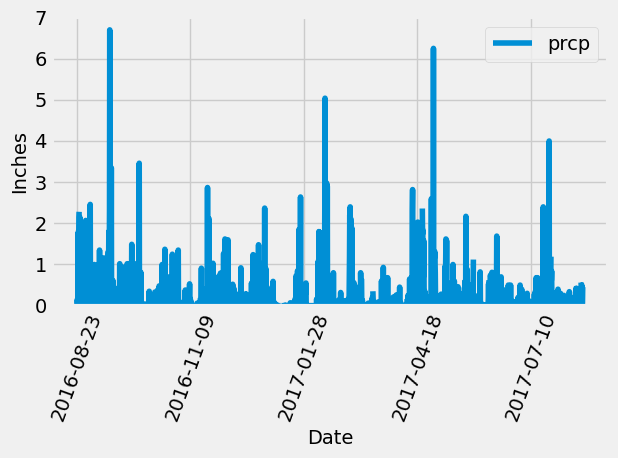

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

values = session.query(measurment.date, measurment.prcp).\
    filter(measurment.date > '2016-08-22').\
    order_by(measurment.date).all()
    #print(values)
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
values_df = pd.DataFrame(values)
values_final_df = values_df.set_index("date")
values_final_df

# Sort the dataframe by date
    # Date already sorted in ascending order since we queried the dates and percip and sorted when creating var "values"

# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
values_final_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations = session.query(station.station).count()
total_number_stations

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurment.station,func.count(measurment.station)).\
    order_by(func.count(measurment.station).desc()).\
    group_by(measurment.station).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
most_active_station = session.query(measurment.station,func.count(measurment.station)).\
    order_by(func.count(measurment.station).desc()).\
    group_by(measurment.station).first()

In [23]:
most_active_station_number = most_active_station[0]
most_active_station_number 

'USC00519281'

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temperature = session.query(func.min(measurment.tobs)).\
    filter(measurment.station == most_active_station_number).all()
print(lowest_temperature)

highest_temperature = session.query(func.max(measurment.tobs)).\
    filter(measurment.station == most_active_station_number).all()
print(highest_temperature)

average_temperature = session.query(func.avg(measurment.tobs)).\
    filter(measurment.station == most_active_station_number).all()
print(average_temperature)



[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(0.0, 70.0)

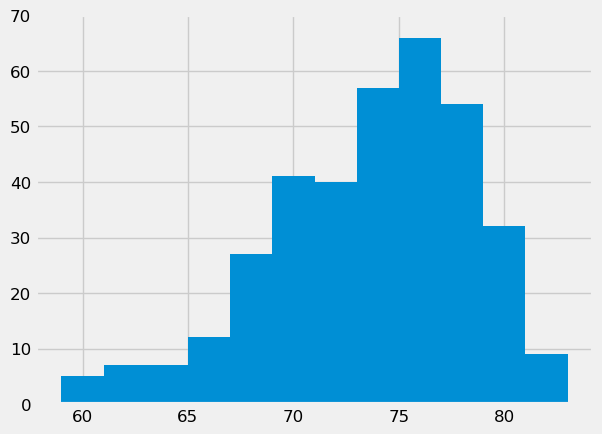

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(measurment.date,measurment.tobs).\
    filter(measurment.station == most_active_station_number).\
    order_by(measurment.date.desc()).first()
#print(most_recent_date_station)

most_recent_date_station = session.query(measurment.date,measurment.tobs).\
    filter(measurment.station == most_active_station_number).\
    order_by(measurment.date.desc()).first()
#print(most_recent_date_station)

twelve_month_values = session.query(measurment.date, measurment.tobs).\
    filter(measurment.station == most_active_station_number).\
    filter(measurment.date > '2016-08-17').all()
#for value in twelve_month_values:
#print(value)

twelev_month_tobs_values_df = pd.DataFrame(twelve_month_values)['tobs']
twelev_month_tobs_values_df

histogram = twelev_month_tobs_values_df.hist(bins=12)
plt.xlabel = ('Temperature (F)')
plt.ylabel = ('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

# Close Session

In [26]:
# Close Session
session.close()